In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import stdev
import pandas as pd
from scipy import stats

## Sample Given

In [ ]:
#####inputs
sample = list(map(float,input("\nEnter the sample : ").strip().split()))
one_sided = input("one-sided test? ")
true_avg = float(input("What is the hypothesized true average? "))
if one_sided == "T":
  one_sided = True
else:
  one_sided = False
alpha = float(input("enter alpha: "))
if one_sided:
  left = input("left one sided test?")
  if left == "T":
    left = True
  else:
    left = False
#####Compute Values
n = len(sample)
s = stdev(sample)
sample_avg = np.mean(sample)
tval = (sample_avg-true_avg)/(s/np.sqrt(n))
df = n-1
if one_sided and left:
  tcrit = stats.t.ppf(alpha, df)
elif one_sided:
  tcrit = stats.t.isf(alpha, df)
else:
  temp = stats.t.isf(alpha/2, df)
  tcrit = (-1*temp, temp)
#####Print Values
print("n= "+str(n))
print("s= "+str(s))
print("mu= "+str(sample_avg))
print("t= "+str(tval))
print("tcrit= "+str(tcrit))
####Hypothesis Rejection
if one_sided and left:
    if tval<t_crit:
        print("REJECT NULL HYPOTHESIS")
    else:
        print("FAIL TO REJECT NULL AT "+str(alpha)+" LEVEL OF SIGNIFICANCE")
elif one_sided:
    if tval>tcrit:
        print("REJECT NULL HYPOTHESIS")
    else:
        print("FAIL TO REJECT NULL AT "+str(alpha)+" LEVEL OF SIGNIFICANCE")
else:
    if tval>0 and tval> temp:
        print("REJECT NULL HYPOTHESIS")
    elif tval<0 and tval<temp:
        print("REJECT NULL HYPOTHESIS")
    else:
        print("FAIL TO REJECT NULL AT "+str(alpha)+" LEVEL OF SIGNIFICANCE")
####Plot T, Tcrit
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.t.ppf(0.001, df),stats.t.ppf(0.999, df), 1000)
ax.plot(x, stats.t.pdf(x, df),'b-', lw=5, alpha=0.6, label='t dist')
if one_sided:
    ax.plot(tcrit, 0, 'r*', label='tcrit')
else:
    ax.plot(tcrit[0], 0, 'r*', label='tcrit')
    ax.plot(tcrit[1], 0, 'r*', label='tcrit')
ax.plot(tval,0,'g*', label='t')

## No Sample Given

In [136]:
d = {'Inhalants': [16, 22, 13], 'South': [9, 30, 18], 'East': [5, 8, 10]}
I = pd.Index(["12-17", "18-25", "26+"], name="")
df = pd.DataFrame(data=d, index=I)

In [137]:
df

,Inhalants,South,East
,,,
12-17,16,9,5
18-25,22,30,8
26+,13,18,10


In [138]:
row_sum = df.sum(axis=1).tolist()
col_sum = df.sum(axis=0).tolist()
grand_total = np.sum(row_sum)
num_rows, num_cols = df.shape
dof = (num_rows-1)*(num_cols-1)
E = 0
chi_2 = 0
for r in range (num_rows):
    print("")
    for c in range (num_cols):
        exp = row_sum[r]*col_sum[c]/grand_total
        print(exp)
        obs = df.iat[r,c]
        chi_2 += ((obs-exp)**2)/exp


11.679389312977099
13.053435114503817
5.267175572519084

23.358778625954198
26.106870229007633
10.534351145038167

15.961832061068701
17.83969465648855
7.198473282442748


In [141]:
alpha = 0.1
chi2_crit = stats.chi2.isf(alpha, dof)

5.781239637675686 7.779440339734858 4


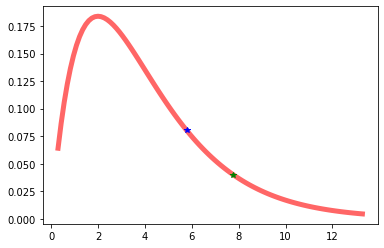

In [142]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.chi2.ppf(0.01, dof),stats.chi2.ppf(0.99, dof), 100)
ax.plot(x, stats.chi2.pdf(x, dof),'r-', lw=5, alpha=0.6, label='chi2 pdf')
ax.plot(chi2_crit, stats.chi2.pdf(chi2_crit, dof), 'g*')
ax.plot(chi_2,stats.chi2.pdf(chi_2, dof), 'b*')
print(chi_2, chi2_crit, dof)